# Assignment 1 


### Large‐Scale Computing for Data Analytics


Student: Silvia Bardoni



In [1]:
#Imports and settings
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sys
from tqdm.notebook import tqdm
from sklearn.datasets import load_diabetes

np.set_printoptions(suppress=True)

#### *Task 1*

In [2]:
# Load the diabetes dataset
x, y = load_diabetes(return_X_y=True)
#help(load_diabetes) # description of dataset

In [3]:
print(x.shape)

(442, 10)


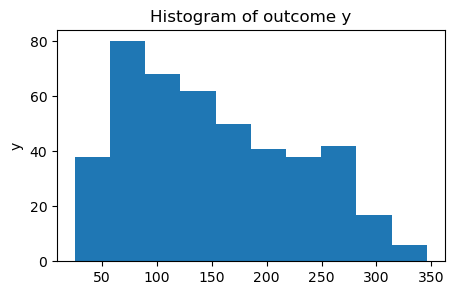

In [4]:
plt.figure(figsize=(5,3))

plt.hist(y)
plt.ylabel('y') 
plt.title("Histogram of outcome y") 
plt.show()

**Comment:** the histogram is right_skewed 

#### *Task 2*

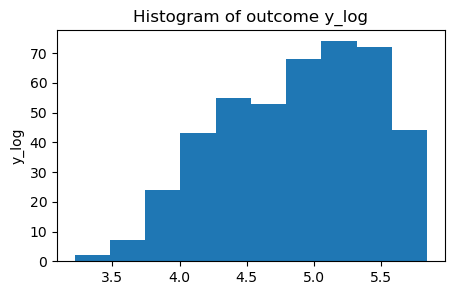

In [5]:
plt.figure(figsize=(5,3))

y_log = np.log(y)  #log the outcome
plt.ylabel('y_log') 
plt.title("Histogram of outcome y_log") 
plt.hist(y_log)
plt.show()

In [6]:
# Split the data into training/testing sets, rounding the split down to the nearest integer
split = 0.8
N = len(y)
sample = int(split*N)

x_train, x_test, y_train, y_test = x[:sample,:], x[sample:, :], y_log[:sample, ], y_log[sample:,]

#### *Task 3*

In [7]:
bmi_train = x_train[:, 2]
bmi_test = x_test[:, 2]

In [8]:
#Create variables to train
b0 = tf.Variable(2.0, dtype=tf.float64)   # initialised as per task4
b1 = tf.Variable(0.0, dtype=tf.float64)   # initialised as per task4

2023-06-17 19:31:03.156943: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 19:31:03.881252: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7426 MB memory:  -> device: 0, name: Tesla M60, pci bus id: 0001:00:00.0, compute capability: 5.2


In [9]:
# define model
def LinearModel(x):
   return tf.add(tf.multiply(x, b1), b0)

In [10]:
# define mean squared error
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

#### *Task4*
Note: that in this and other tasks I will be printing every 100 epochs to save visual space in the notebook. Sometimes I commented out the printing line.

In [11]:
# compile
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) 
epochs = range(5000)

In [12]:
for i in epochs:
    with tf.GradientTape() as tape:
        predicted = LinearModel(bmi_train) 
        current_loss_train = loss(y_train, predicted)
        current_loss_test = loss(y_test, LinearModel(bmi_test))
    gradients = tape.gradient(current_loss_train, [b1, b0])
    optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
    if i%100 == 0: #every 100 steps
        print('epoch: ' + str(i) + ' b0: ' + str(b0) + ' b1: ' + str(b1) + '  Loss_train = ' + str(current_loss_train) + ' Loss_test = ' + str(current_loss_test))

epoch: 0 b0: <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.057613008877964> b1: <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.0002402607483616333>  Loss_train = tf.Tensor(8.600350131627982, shape=(), dtype=float64) Loss_test = tf.Tensor(8.664967792937698, shape=(), dtype=float64)
epoch: 100 b0: <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.506269356256135> b1: <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.02619927726789916>  Loss_train = tf.Tensor(0.44744418975242994, shape=(), dtype=float64) Loss_test = tf.Tensor(0.4951272956140151, shape=(), dtype=float64)
epoch: 200 b0: <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.831023088231512> b1: <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.0533185724868797>  Loss_train = tf.Tensor(0.30331861304491464, shape=(), dtype=float64) Loss_test = tf.Tensor(0.34863622090910223, shape=(), dtype=float64)
epoch: 300 b0: <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.874105

In [15]:
# loss it still decreasing after 5000 epochs

Repeating in Tensorbard to confirm. Parameters re-initialised. Clearer printing.

In [13]:
# Set up logging jupiterhub tensorboard
logdir = '/home/jovyan/logs/Silvia'
writer = tf.summary.create_file_writer(logdir)

#Create variables to train
b0 = tf.Variable(2.0, dtype=tf.float64)
b1 = tf.Variable(0.0, dtype=tf.float64)

with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss_train = loss(y_train, predicted)
            current_loss_test = loss(y_test, LinearModel(bmi_test))
        gradients = tape.gradient(current_loss_train, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
        if i%100 == 0: #every 100 steps
            tf.print("epoch:", i, "current_loss train:", current_loss_train, "current_loss test:", current_loss_test, "b0:",  b0, "b1:", b1, output_stream=sys.stdout)
            tf.summary.scalar('loss_mse', current_loss_train, step=i)

  0%|          | 0/5000 [00:00<?, ?it/s]

epoch: 0 current_loss train: 8.600350131627982 current_loss test: 8.6649677929376985 b0: 2.0576130088779641 b1: 0.0002402607483616333
epoch: 100 current_loss train: 0.44744418975242994 current_loss test: 0.49512729561401508 b0: 4.5062693562561353 b1: 0.026199277267899161
epoch: 200 current_loss train: 0.30331861304491464 current_loss test: 0.34863622090910223 b0: 4.8310230882315119 b1: 0.0533185724868797
epoch: 300 current_loss train: 0.30005708309353896 current_loss test: 0.34489910853915212 b0: 4.8741059324555875 b1: 0.0804907356618281
epoch: 400 current_loss train: 0.2992792458844924 current_loss test: 0.343891685832404 b0: 4.8798336739606647 b1: 0.10756933348481711
epoch: 500 current_loss train: 0.29855122582818394 current_loss test: 0.34296738438152446 b0: 4.8806073415272611 b1: 0.13453537512226715
epoch: 600 current_loss train: 0.29783016388324984 current_loss test: 0.34205583602300127 b0: 4.8807239424908282 b1: 0.16138676926278853
epoch: 700 current_loss train: 0.297115254466259

In [14]:
#saving parameters for plotting later
slope_mse = b1
intercept_mse = b0

#### *Task5* - mae mean absolute error

In [15]:
# Reinitialize variables to train
b0 = tf.Variable(2.0, dtype=tf.float64)
b1 = tf.Variable(0.0, dtype=tf.float64)

#model as before
def LinearModel(x):
    return tf.add(tf.multiply(x, b1), b0)
    
# define mean absolute error as loss
def loss_mae(y_true, y_pred):
    return (tf.reduce_mean(tf.abs(tf.Variable(y_true) - y_pred)))

In [16]:
with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss_train = loss_mae(y_train, predicted)
            current_loss_test = loss_mae(y_test, LinearModel(bmi_test))
        gradients = tape.gradient(current_loss_train, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
    
        # write the value to tensorboard summary stats and print
        if i%100 == 0: #every 100 time steps
            tf.print("epoch:", i, "current_loss train:", current_loss_train, "current_loss test:", current_loss_test, "b0:",  b0, "b1:", b1, output_stream=sys.stdout)
            tf.summary.scalar('loss_mae', current_loss_train, step=i)

  0%|          | 0/5000 [00:00<?, ?it/s]

epoch: 0 current_loss train: 2.8806505082857483 current_loss test: 2.8839899219744765 b0: 2.0099999997764826 b1: -6.0011002141582988e-06
epoch: 100 current_loss train: 1.8806501705054446 current_loss test: 1.8839913727151194 b0: 3.0099999774247408 b1: -0.00060611112162998885
epoch: 200 current_loss train: 0.92693119545307157 current_loss test: 0.93001315407965512 b0: 3.9850707771599581 b1: -0.00048366057592306755
epoch: 300 current_loss train: 0.52316210487223846 current_loss test: 0.57775073671201638 b0: 4.5965721799224273 b1: 0.010383419723680848
epoch: 400 current_loss train: 0.47101906522263076 current_loss test: 0.51941934478463236 b0: 4.8161189172248031 b1: 0.029725295289828351
epoch: 500 current_loss train: 0.46224572921147505 current_loss test: 0.5096506628914802 b0: 4.9013880371319152 b1: 0.049896216982300269
epoch: 600 current_loss train: 0.46073436428806441 current_loss test: 0.50787444159746131 b0: 4.9320962517429754 b1: 0.070945074636411962
epoch: 700 current_loss train: 0

In [18]:
#saving parameters
slope_mae = b1
intercept_mae = b0

In [20]:
print(slope_mse, slope_mae, intercept_mse, intercept_mae)

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2358569440649216> <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.932545854634637> <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.88138548295267> <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.942492852077151>


#### *Task6* - plotting

In [21]:
# Calculating the predictions of final model
predictions_mae_train = slope_mae * bmi_train + intercept_mae 
predictions_mse_train = slope_mse * bmi_train + intercept_mse
predictions_mae_test = slope_mae * bmi_test + intercept_mae 
predictions_mse_test = slope_mse * bmi_test + intercept_mse

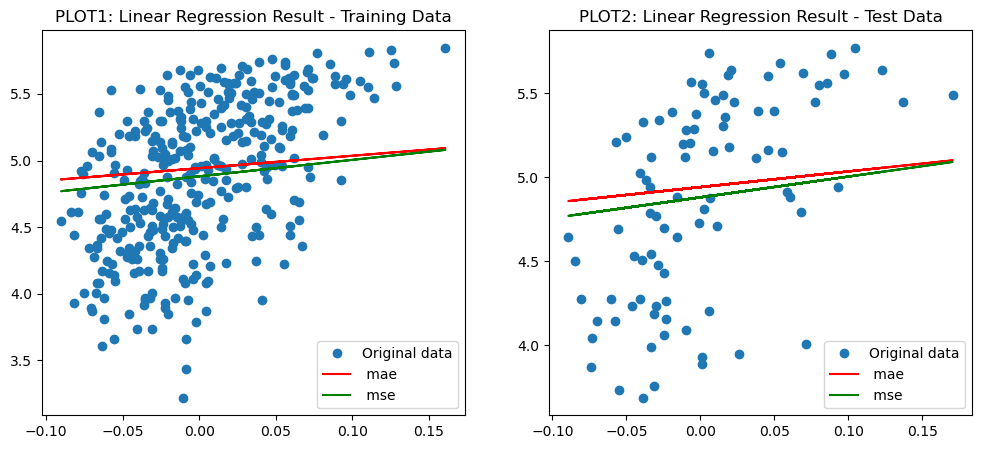

In [22]:
#define grid of plots
fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(12, 5))

# Plotting the Results for training data
ax[0].plot(bmi_train, y_train, 'o', label ='Original data') # y_train is alredy logged
ax[0].plot(bmi_train, predictions_mae_train, label =' mae', color ='red') 
ax[0].plot(bmi_train, predictions_mse_train, label =' mse', color = 'green') 
ax[0].set(title='PLOT1: Linear Regression Result - Training Data', xlabel='', 
       ylabel='');
ax[0].legend() 

# Plotting the Results for test data
ax[1].plot(bmi_test, y_test, 'o', label ='Original data') 
ax[1].plot(bmi_test, predictions_mae_test, label =' mae', color ='red') 
ax[1].plot(bmi_test, predictions_mse_test, label =' mse', color = 'green') 
ax[1].set(title='PLOT2: Linear Regression Result - Test Data', xlabel='', 
       ylabel='');
ax[1].legend() 

plt.show()

Coefficients for mae: mean squared error and mse: mean absolute error are close, so the regression lines are similar.
Intercept for mse is lower and slope slightly higher. 


Not much difference in terms of regression lines between train and test data. mse sligtly better

#### *Task7*

  0%|          | 0/10000 [00:00<?, ?it/s]

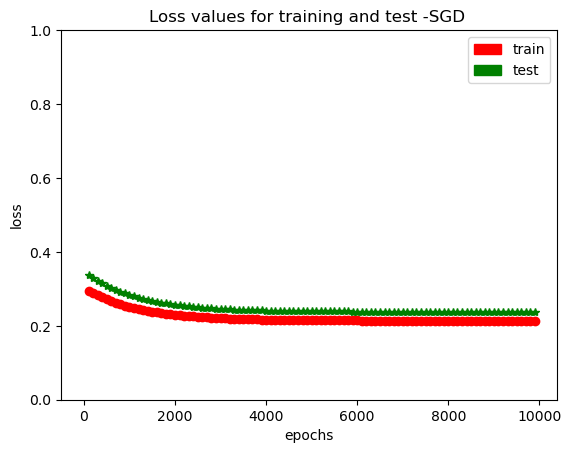

In [23]:
b0 = tf.Variable(2.0, dtype=tf.float64)   # re-initialised
b1 = tf.Variable(0.0, dtype=tf.float64)   # re-initialised 

# Set up logging jupiterhub tensorboard
logdir = '/home/jovyan/logs/Silvia'
writer = tf.summary.create_file_writer(logdir)

# compile
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
epochs = range(10000)

#model
def LinearModel(x):
    return tf.add(tf.multiply(x, b1), b0)
    
# define mean squared error
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

current_loss_train_SGD = []
current_loss_test_SGD = []

with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss_train = loss(y_train, predicted)
            current_loss_test = loss(y_test, LinearModel(bmi_test))
        gradients = tape.gradient(current_loss_train, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))    
        # write the value to tensorboard summary stats and print
        if i%100 == 0: #control steps
            #tf.print("epoch:", i, "current_loss_train:", current_loss_train, "current_loss_test:", current_loss_test, "b0:",  b0, "b1:", b1, output_stream=sys.stdout)
            plt.ylim(0, 1)
            plt.plot(i, current_loss_train, 'o', label ='train', color = 'red') 
            plt.plot(i, loss(y_test, LinearModel(bmi_test)), '*', label ='test', color ='green')
            plt.xlabel('epochs')
            plt.ylabel('loss')
            plt.title('Loss values for training and test -SGD ')
            current_loss_train_SGD.append(current_loss_train)
            current_loss_test_SGD.append(current_loss_test)
            
#legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='train')
green_patch = mpatches.Patch(color='green', label='test')

plt.legend(handles=[red_patch, green_patch])
        

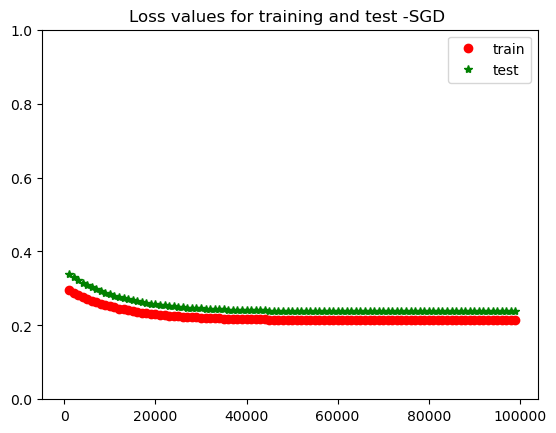

In [24]:
#Reproducing same plot using the saved losses' lists instead
control_steps = len(current_loss_train_SGD)
epochs = np.arange(control_steps)*1000

plt.ylim(0, 1)
plt.plot(epochs, current_loss_train_SGD, 'o', color ='red', label ='train')
plt.plot(epochs, current_loss_test_SGD, '*', color ='green', label = 'test')
plt.title('Loss values for training and test -SGD ')
plt.legend()
plt.show()

#### *Task8* - Adam

  0%|          | 0/10000 [00:00<?, ?it/s]

epoch: 0 current_loss_train: 8.600350131627982 current_loss_test: 8.6649677929376985 b0: 2.0999999466015358 b1: 0.099986841280427868
epoch: 100 current_loss_train: 0.21417118049004641 current_loss_test: 0.23801670405391998 b0: 4.8698619826330516 b1: 6.2930106588212267
epoch: 200 current_loss_train: 0.21386211853259088 current_loss_test: 0.23830097304028316 b0: 4.8844755903736861 b1: 6.4283150460025595
epoch: 300 current_loss_train: 0.21386211782783948 current_loss_test: 0.23830190612143873 b0: 4.8845081505887817 b1: 6.42863546361353
epoch: 400 current_loss_train: 0.2138621178278014 current_loss_test: 0.23830191153707914 b0: 4.8845083943098482 b1: 6.4286350101632319
epoch: 500 current_loss_train: 0.2138621178278014 current_loss_test: 0.23830191162921802 b0: 4.8845083966856224 b1: 6.4286350202588824
epoch: 600 current_loss_train: 0.2138621178278014 current_loss_test: 0.23830191162883105 b0: 4.8845083966717109 b1: 6.4286350203845828
epoch: 700 current_loss_train: 0.2138621178278014 curren

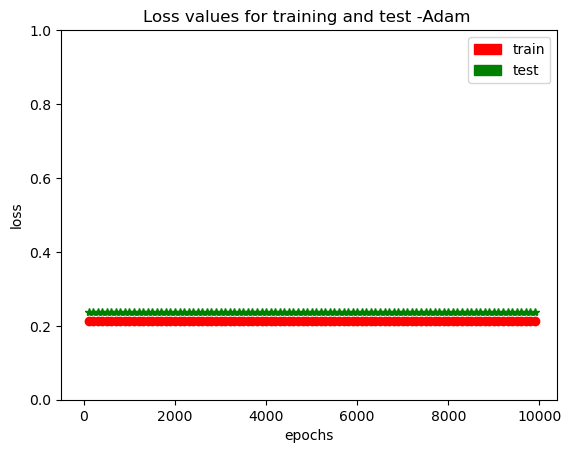

In [33]:
b0 = tf.Variable(2.0, dtype=tf.float64)
b1 = tf.Variable(0.0, dtype=tf.float64)

# compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1) 

epochs = range(10000)

#model
def LinearModel(x):
    return tf.add(tf.multiply(x, b1), b0)
    
# define mean squared error
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

current_loss_train_Adam = []
current_loss_test_Adam = []

with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss_train = loss(y_train, predicted)
            current_loss_test = loss(y_test, LinearModel(bmi_test))
        gradients = tape.gradient(current_loss_train, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))    
        # write the value to tensorboard summary stats and print
        if i%100 == 0: #control steps
            tf.print("epoch:", i, "current_loss_train:", current_loss_train, "current_loss_test:", current_loss_test, "b0:",  b0, "b1:", b1, output_stream=sys.stdout)
            plt.ylim(0, 1)
            plt.plot(i, current_loss_train, 'o', label ='train', color = 'red') 
            plt.plot(i, loss(y_test, LinearModel(bmi_test)), '*', label ='test', color ='green')
            plt.xlabel('epochs')
            plt.ylabel('loss')
            plt.title('Loss values for training and test -Adam ')
            current_loss_train_Adam.append(current_loss_train)
            current_loss_test_Adam.append(current_loss_test)
            
#legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='train')
green_patch = mpatches.Patch(color='green', label='test')

plt.legend(handles=[red_patch, green_patch])

Training loss is lower than the test loss for both SGD and Adam which is normal behaviour. Model is not overfitting or underfitting.

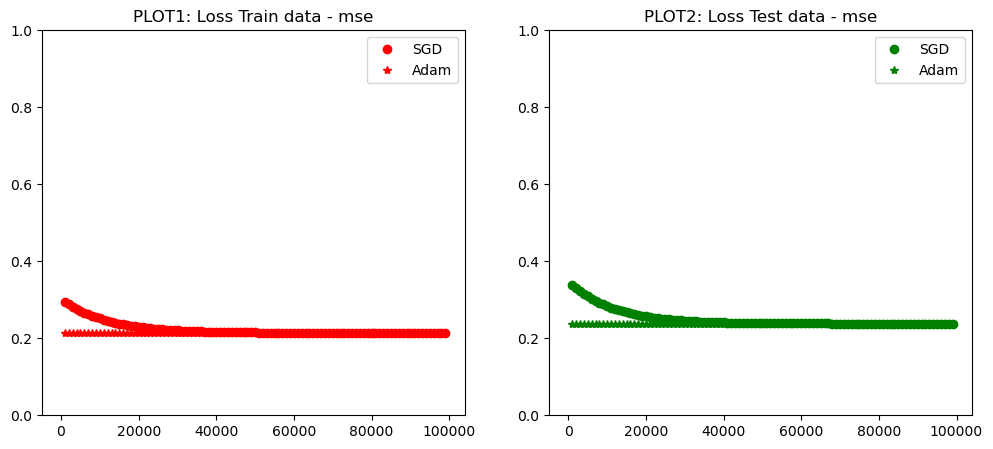

In [34]:
# Comparing the losses
control_steps = len(current_loss_train_SGD)
epochs = np.arange(control_steps)*1000

#define grid of plots
fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(12, 5))


# Plotting the Results for training data
ax[0].plot(epochs, current_loss_train_SGD, 'o', color ='red', label ='SGD')
ax[0].plot(epochs, current_loss_train_Adam, '*', color ='red', label ='Adam') 
ax[0].set(title='PLOT1: Loss Train data - mse', xlabel='', ylabel='');
ax[0].set_ylim([0, 1])
ax[0].legend() 

# Plotting the Results for test data
ax[1].plot(epochs, current_loss_test_SGD, 'o', color ='green', label = 'SGD') 
ax[1].plot(epochs, current_loss_test_Adam, '*', color ='green', label = 'Adam') 
ax[1].set(title='PLOT2: Loss Test data - mse', xlabel='', ylabel='');
ax[1].set_ylim([0, 1])
ax[1].legend() 

plt.show()


Adam converges really fast compared to SGD. Learning rate of 0.1 for Adam is too big. 

For SGD we don't need to run for 10.000 epochs and we can stop much earlier, around 30.000 epochs.